<a href="https://colab.research.google.com/github/Enneigardik/Ex/blob/main/%D0%A1%D0%B5%D0%BC2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from itertools import zip_longest
from IPython.display import display, Math, Latex
import matplotlib
import matplotlib.pyplot as plt

class Polynomial:
  def __init__(self, a):
    self.a = [x for x in a]
  def diff(self):
    b = []
    for k in range(1, len(self.a)):
      b.append(k * self.a[k])
    return Polynomial(b)
  def __str__(self):
    s = ""
    for k in range(len(self.a)-1,1,-1):
      s += str(self.a[k])+"*x^"+str(k) + "+"
    s += str(self.a[1]) + "*x+" + str(self.a[0])
    return s
  def __add__(self, other):
    num=[]
    for i in range(max(len(self.a), len(other.a))):
      num = [a + b for (a, b) in zip_longest(self.a, other.a, fillvalue=0)]
    return Polynomial(num)
  def __sub__(self, other):
    num=[]
    for i in range(max(len(self.a), len(other.a))):
      num = [a - b for (a, b) in zip_longest(self.a, other.a, fillvalue=0)]
    return Polynomial(num)
  def evalf(self, x):
    i = len(self.a) - 1
    num=0
    while i >= 0:
      a = self.a[i]
      num+=a*x**i
      i-=1
    return num
  def show(self):
    display(Math(self.toLatex()))
 #14
  def toLatex(self):
    i = len(self.a)-1
    res = ""#str(self.a[i]) + "x^" + str(i)
    while i >= 0:
      a = self.a[i]
      if a < 0:
        res += " - "
        if a != 1:
          res += str(-a)
      if a > 0:
        res += " + "
        if a != 1:
          res+= str(a)
      if a == 0:
        i -= 1
        continue
      if i == 1 or a == 1:
        res += "x"
      if i > 1:
        res += "x^" + str(i)
      i -= 1
    return res
  #график честно стыбзен
  def plot(self, left, right):
        X, Y = [], []
        for i in range(left, right+1):
            X.append(i)
            tmpY = 0
            for j in range(0, len(self.a)):
                tmpY += self.a[j]*(i ^ j)
            Y.append(tmpY)

        fig, ax = plt.subplots(figsize=(12, 9))
        ax.plot(X, Y, color="red", lw=5)
        plt.show()

9*x^5+8*x^4+4*x^3+2*x^2+3*x+1   1*x^2+1*x+1
9*x^5+8*x^4+4*x^3+3*x^2+4*x+2
9*x^5+8*x^4+4*x^3+1*x^2+2*x+0
463


<IPython.core.display.Math object>

None


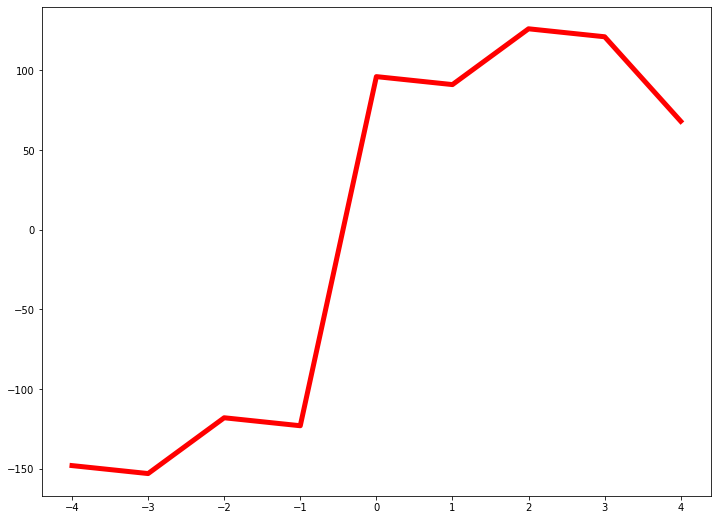

In [15]:
P = Polynomial([1,3,2,4, 8, 9])
Q = Polynomial([1,1,1])
print(P," ", Q)
print(P+Q)
print(P-Q)
print(P.evalf(2))
print(P.show())

P.plot(-4,4)